In [ ]:
# default_exp 
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing the Flow Embedder

Setting up a few simple test cases:

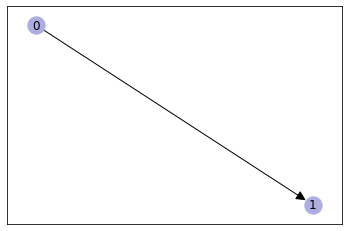

In [ ]:
from directed_graphs.datasets import SmallRandom, visualize_graph, ChainGraph
import torch_geometric
from torch_geometric.utils import to_networkx
dataset = ChainGraph()
data = dataset[0]
visualize_graph(data)

And let's embed this with the Flow Embedder!

In [ ]:
from directed_graphs.flow_embedding import FlowEmbedder
fe = FlowEmbedder(data,"euclidean",5)

/Users/adjourner/Projects/directed_graphs/directed_graphs/flow_embedding.py:54: UserWarning: Graph is not strongly connected. Embedding results are not guaranteed. Consider tweaking the constant for 'disconnected distance'.
  warnings.warn("Graph is not strongly connected. Embedding results are not guaranteed. Consider tweaking the constant for 'disconnected distance'.")


In [ ]:
embeddings = fe.fit()

100%|██████████| 1000/1000 [00:05<00:00, 197.28it/s]

Exiting training with loss  tensor(0.1979, grad_fn=<PowBackward0>)


In [ ]:
fe.embedding_D

tensor([[0.0000e+00, 2.8185e-01],
        [9.9940e+02, 0.0000e+00]], grad_fn=<CopySlices>)

In [ ]:
fe.flow_field_parameters

Parameter containing:
tensor([0.8848, 0.4758], requires_grad=True)

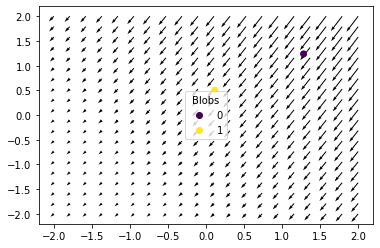

In [ ]:
fe.visualize_points()

In [ ]:
fe.flow_field_parameters

Parameter containing:
tensor([0.8848, 0.4758], requires_grad=True)

In [ ]:
fe.flow_field_parameters2

Parameter containing:
tensor([ 0.8396, -1.0002], requires_grad=True)

In [ ]:
import matplotlib.pyplot as plt
x,y = np.meshgrid(np.linspace(-2,2,20),np.linspace(-2,2,20))

#specify direction of vector field
u = fe.polynomial_flow_field(torch.tensor(x),torch.tensor(y)).detach().numpy() # vector field in x direction
v = fe.polynomial_flow_field2(torch.tensor(x),torch.tensor(y)).detach().numpy() # vector field in x direction

""" 
quiver 
  plots a 2D field of arrows
  quiver([X, Y], U, V, [C], **kw); 
  X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.
"""
plt.quiver(x,y,u,v)
sc = plt.scatter(fe.embedded_points[:,0].detach(),fe.embedded_points[:,1].detach(), c=[0,1])
plt.legend(handles = sc.legend_elements()[0], title="Blobs", labels=list(range(2)))
"""Display all open figures."""
plt.show()

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
x, y = np.meshgrid(np.linspace(-2,2,20),np.linspace(-2,2,20))
x = torch.tensor(x,dtype=float)
y = torch.tensor(y,dtype=float)

In [ ]:
xy_t = torch.concat([x[:,:,None],y[:,:,None]],dim=2).float()

In [ ]:
from torch import nn
nl = nn.Linear(2,2)

In [ ]:
nl(xy_t).shape

torch.Size([20, 20, 2])

In [ ]:
type(xy_t)

torch.Tensor

In [ ]:
nl(torch.rand(10,2))

tensor([[-0.1428, -0.2070],
        [-0.0384, -0.6099],
        [-0.2173, -0.4251],
        [-0.2554, -0.4843],
        [-0.0649, -0.3071],
        [-0.1556, -0.3859],
        [-0.1852, -0.5500],
        [-0.0865, -0.2859],
        [-0.1845, -0.6432],
        [-0.2429, -0.8230]], grad_fn=<AddmmBackward0>)

In [ ]:
xy_t[:,:,0].shape

torch.Size([20, 20])